# This notebook contains plots and results not used in the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
grid_search_dir = '../grid_search_data'

In [ ]:
# Get the gridsearch data for the decision tree
dt_gs = pd.read_csv("../grid_search_data/dt_grid_search_{'max_depth': [3, 6, 9, 12, 15, 18, 21]}.csv")

# Get the gridsearch data for the random forest
rf_gs1 = pd.read_csv("../grid_search_data/rf_grid_search_{'n_estimators': [100, 200, 400], 'max_depth': [3, 6, 9, 12, 15, 18, 21]}.csv")
rf_gs2 = pd.read_csv("../grid_search_data/rf_grid_search_{'n_estimators': [100, 200, 400], 'max_depth': [21, 27, 33, 39, 45]}.csv")
rf_gs3 = pd.read_csv("../grid_search_data/rf_grid_search_{'n_estimators': [100, 200, 400], 'max_depth': [45, 51, 57, 63, 69, 75]}.csv")
rf_gs = pd.concat([rf_gs1, rf_gs2, rf_gs3]) # Splice the dataframes together
rf_gs = rf_gs.drop_duplicates(subset='params', keep='first') # drop duplicates of params (keep the first one)

# Get the gridsearch data for the gradient boosting
gb_gs = pd.read_csv("../grid_search_data/bagging_grid_search_{'n_estimators': [50, 100], 'estimator__max_depth': [9, 12, 15]}.csv")
xgb_gs = pd.read_csv(grid_search_dir + "/xgb_grid_search_max_depth_3_4_learning_rate_0.5_0.1_subsample_0.5_0.7.csv")

OSError: [Errno 22] Invalid argument: "../grid_search_data/rf_grid_search_{'n_estimators': [100, 200, 400], 'max_depth': [45, 51, 57, 63, 69, 75]}.csv"

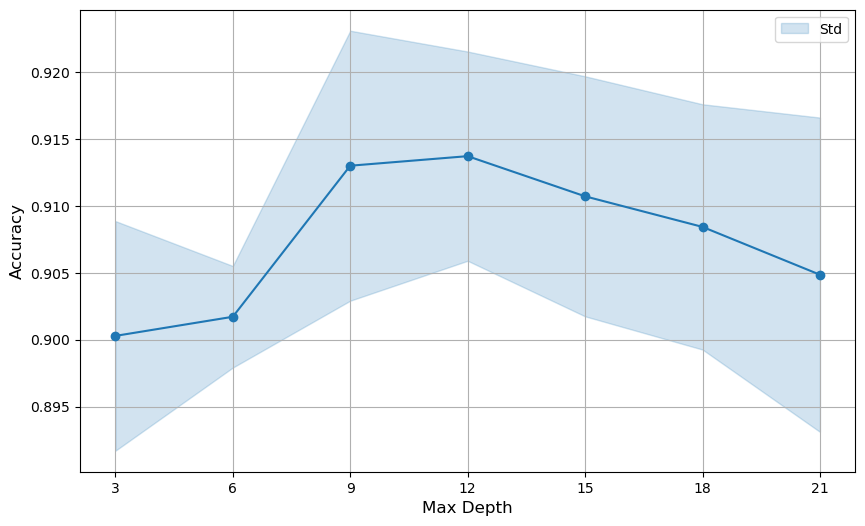

In [49]:
# Plot the mean test scores with std as error bars for decision tree
plt.figure(figsize=(10, 6))

plt.plot(dt_gs['param_max_depth'], dt_gs['mean_test_score'], marker='o', color='tab:blue')

plt.fill_between(dt_gs['param_max_depth'], 
                 dt_gs['mean_test_score'] - dt_gs['std_test_score'], 
                 dt_gs['mean_test_score'] + dt_gs['std_test_score'], 
                 color='tab:blue', alpha=0.2, label='Std')

plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.legend()
plt.xticks(dt_gs['param_max_depth'].astype(int))

plt.grid(True)
plt.savefig("../figures/dt_depth_search.png")
plt.show()

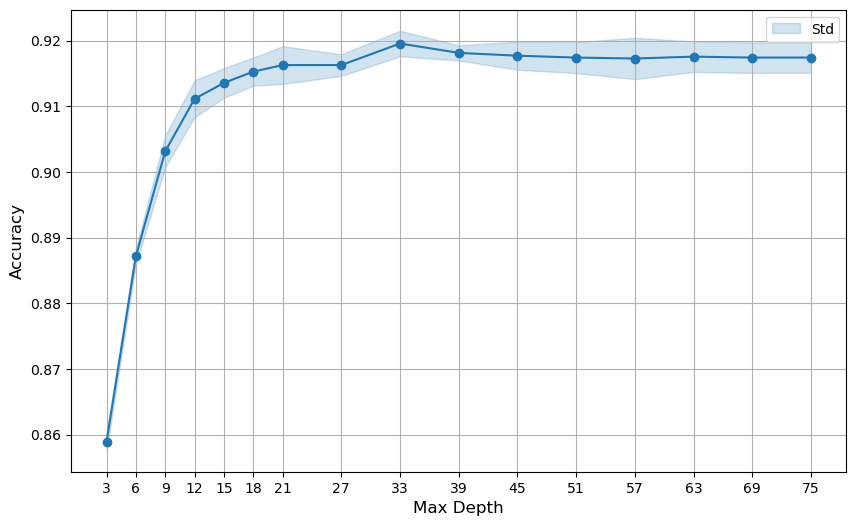

In [62]:
# Plot the accuracy for the random forest over the max depth for number of estimators = 100
plt.figure(figsize=(10, 6))

rf_gs_100 = rf_gs[rf_gs['param_n_estimators'] == 100]

plt.plot(rf_gs_100['param_max_depth'], rf_gs_100['mean_test_score'], marker='o', color='tab:blue')
plt.fill_between(rf_gs_100['param_max_depth'],
                    rf_gs_100['mean_test_score'] - rf_gs_100['std_test_score'],
                    rf_gs_100['mean_test_score'] + rf_gs_100['std_test_score'],
                    color='tab:blue', alpha=0.2, label='Std')

plt.xticks(rf_gs_100['param_max_depth'].astype(int))
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



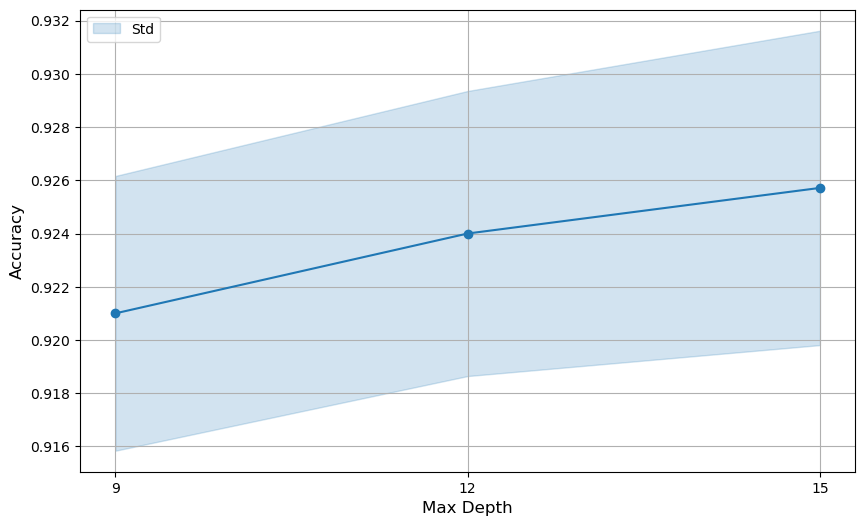

In [60]:
# Plot the mean test scores with std as error bars for gradient boosting for n_estimators = 100
plt.figure(figsize=(10, 6))

gb_gs_100 = gb_gs[gb_gs['param_n_estimators'] == 100]

plt.plot(gb_gs_100['param_estimator__max_depth'], gb_gs_100['mean_test_score'], marker='o', color='tab:blue')

plt.fill_between(gb_gs_100['param_estimator__max_depth'],
                    gb_gs_100['mean_test_score'] - gb_gs_100['std_test_score'],
                    gb_gs_100['mean_test_score'] + gb_gs_100['std_test_score'],
                    color='tab:blue', alpha=0.2, label='Std')

plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.legend()
plt.xticks(gb_gs_100['param_estimator__max_depth'].astype(int))

plt.grid(True)
# plt.savefig("../figures/gb_depth_search.png")
plt.show()


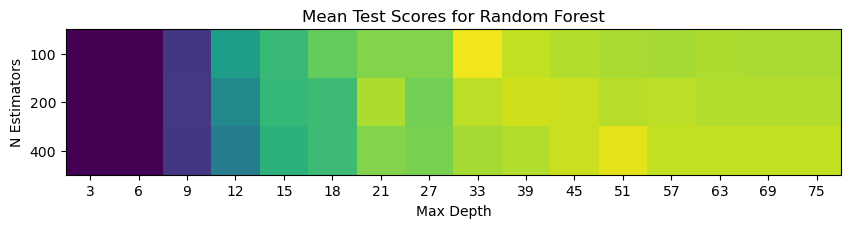

In [46]:

# plot a heatmap of the mean test scores for random forest
rf_gs_pivot = rf_gs.pivot(index='param_n_estimators',   
                            columns='param_max_depth', 
                            values='mean_test_score')
plt.figure(figsize=(10, 6))
plt.imshow(rf_gs_pivot, cmap='viridis')
plt.title('Mean Test Scores for Random Forest')
plt.yticks(range(len(rf_gs_pivot.index)), rf_gs_pivot.index)
plt.xticks(range(len(rf_gs_pivot.columns)), rf_gs_pivot.columns)
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
# plt.colorbar(label='Mean Test Score')
plt.clim(0.9, 0.92)
# plt.savefig("../figures/rf_heatmap.png")
plt.show()

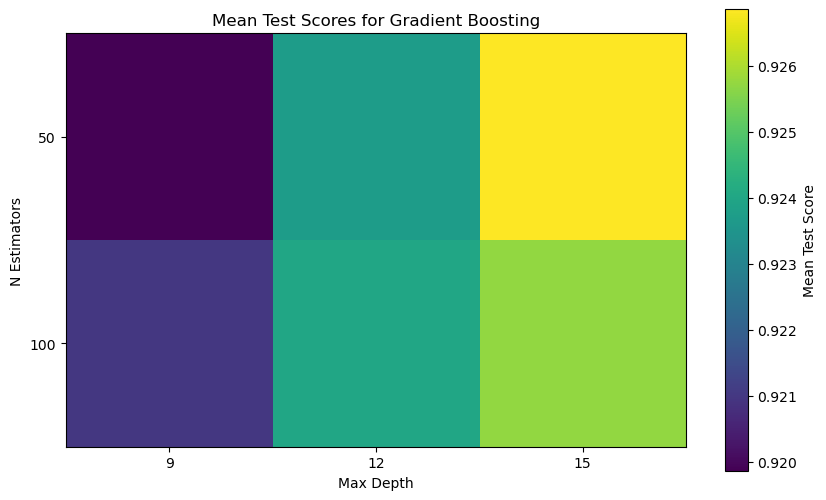

In [74]:
# plot a heatmap of the mean test scores for gradient boosting
gb_gs_pivot = gb_gs.pivot(index='param_n_estimators',   
                            columns='param_estimator__max_depth', 
                            values='mean_test_score')
plt.figure(figsize=(10, 6))
plt.imshow(gb_gs_pivot, cmap='viridis')
plt.title('Mean Test Scores for Gradient Boosting')
plt.yticks(range(len(gb_gs_pivot.index)), gb_gs_pivot.index)
plt.xticks(range(len(gb_gs_pivot.columns)), gb_gs_pivot.columns)
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.colorbar(label='Mean Test Score')
# plt.clim(0.91, 0.93)
# plt.savefig("../figures/gb_heatmap.png")
plt.show()

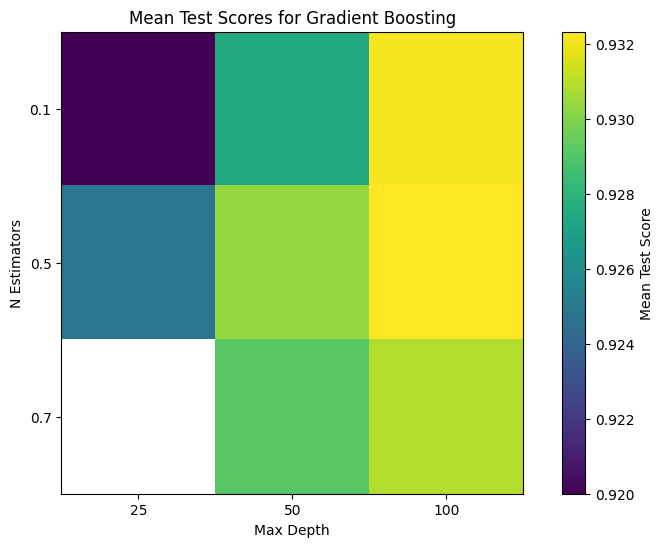

In [12]:
xgb_gs = pd.read_csv(grid_search_dir + "/xgb_grid_search_n_estimators_25_50_100_learning_rate_0.7_0.5_0.1.csv")

# plot a heatmap of the mean test scores for gradient boosting
xgb_gs_pivot = xgb_gs.pivot(index='param_learning_rate',   
                            columns='param_n_estimators', 
                            values='mean_test_score')
plt.figure(figsize=(10, 6))
plt.imshow(xgb_gs_pivot, cmap='viridis')
plt.title('Mean Test Scores for Gradient Boosting')
plt.yticks(range(len(xgb_gs_pivot.index)), xgb_gs_pivot.index)
plt.xticks(range(len(xgb_gs_pivot.columns)), xgb_gs_pivot.columns)
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.colorbar(label='Mean Test Score')
# plt.clim(0.91, 0.93)
# plt.savefig("../figures/gb_heatmap.png")
plt.show()

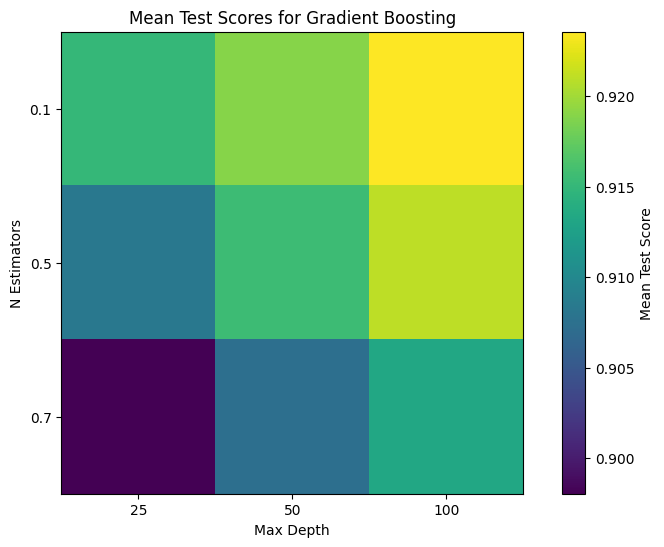

In [4]:
gb_gs = pd.read_csv(grid_search_dir + "/gb_grid_search_n_estimators_25_50_100_learning_rate_0.7_0.5_0.1.csv")

# plot a heatmap of the mean test scores for gradient boosting
gb_gs_pivot = gb_gs.pivot(index='param_learning_rate',   
                            columns='param_n_estimators', 
                            values='mean_test_score')
plt.figure(figsize=(10, 6))
plt.imshow(gb_gs_pivot, cmap='viridis')
plt.title('Mean Test Scores for Gradient Boosting')
plt.yticks(range(len(gb_gs_pivot.index)), gb_gs_pivot.index)
plt.xticks(range(len(gb_gs_pivot.columns)), gb_gs_pivot.columns)
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.colorbar(label='Mean Test Score')
# plt.clim(0.91, 0.93)
# plt.savefig("../figures/gb_heatmap.png")
plt.show()